In [ ]:
!ls ./demand-forecasting-kernels-only

In [20]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
X = pd.Series(np.random.normal(size=(3,)))
X

0   -0.537265
1   -0.005625
2    0.144575
dtype: float64

In [7]:
X.shift()

0         NaN
1   -0.537265
2   -0.005625
dtype: float64

In [8]:
df = pd.read_csv("./demand-forecasting-kernels-only/train.csv")
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [9]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [13]:
# df["item"].unique().shape

In [15]:
# df.groupby("store").agg({"item": "count"}).reset_index()

In [16]:
store1_item1 = df[(df['store'] == 1) & (df['item'] == 1)].sort_values("date").reset_index(drop=True)

/var/folders/45/f8jn2c4n4sdg_pxl6qc5gmcr0000gn/T/ipykernel_4768/2642546184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store1_item1["sales"])


<AxesSubplot: xlabel='sales', ylabel='Density'>

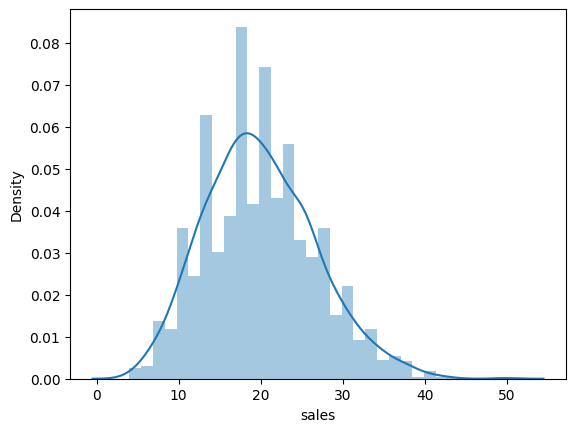

In [17]:
sns.distplot(store1_item1["sales"])

In [18]:
store1_item1.diff(1)['date'].drop_duplicates()

0      NaT
1   1 days
Name: date, dtype: timedelta64[ns]

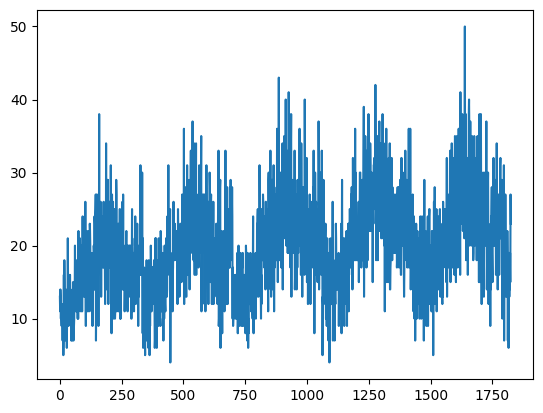

In [21]:
plt.plot(store1_item1["sales"])

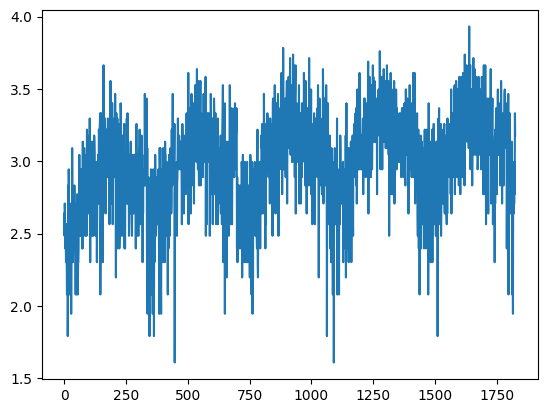

In [22]:
plt.plot(np.log1p(store1_item1["sales"]))

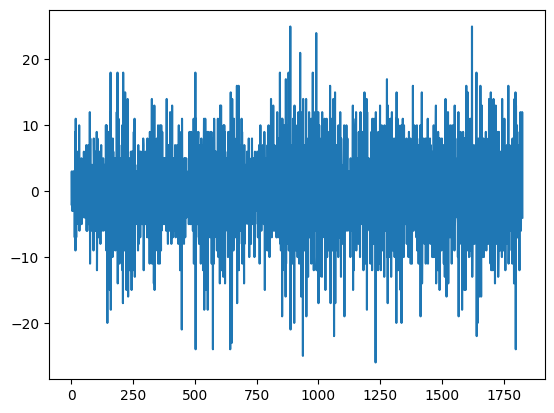

In [23]:
plt.plot(store1_item1["sales"].diff(1))

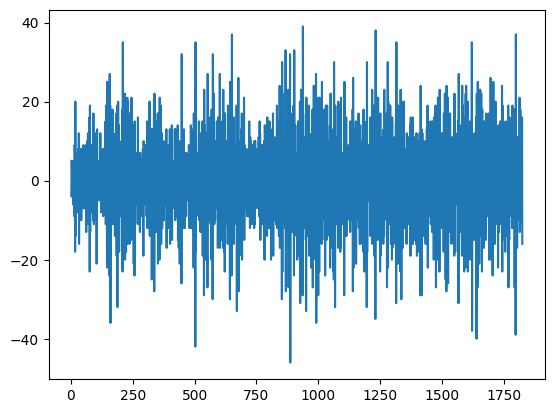

In [24]:
plt.plot(store1_item1["sales"].diff(1).diff(1))

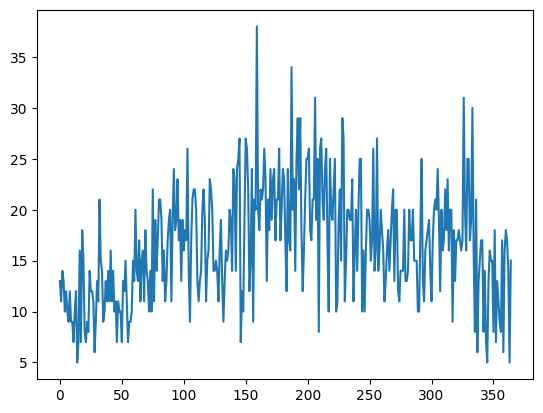

In [25]:
plt.plot(store1_item1["sales"].iloc[:365])

In [26]:
store1_item1['month'] = store1_item1['date'].dt.month
store1_item1['year'] = store1_item1['date'].dt.year
store1_item1.head()

,date,store,item,sales,month,year
0,2013-01-01,1,1,13,1,2013
1,2013-01-02,1,1,11,1,2013
2,2013-01-03,1,1,14,1,2013
3,2013-01-04,1,1,13,1,2013
4,2013-01-05,1,1,10,1,2013


In [27]:
store1_item1.loc[store1_item1['month'] == 1]

,date,store,item,sales,month,year
0,2013-01-01,1,1,13,1,2013
1,2013-01-02,1,1,11,1,2013
2,2013-01-03,1,1,14,1,2013
3,2013-01-04,1,1,13,1,2013
4,2013-01-05,1,1,10,1,2013
...,...,...,...,...,...,...
1487,2017-01-27,1,1,10,1,2017
1488,2017-01-28,1,1,16,1,2017
1489,2017-01-29,1,1,24,1,2017
1490,2017-01-30,1,1,9,1,2017


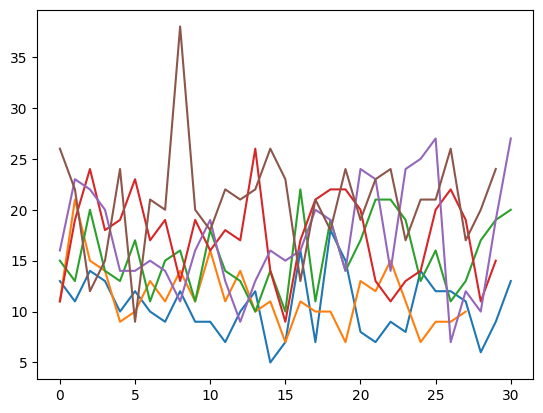

In [28]:
plt.plot(store1_item1.loc[(store1_item1['month'] == 1) & (store1_item1['year'] == 2013)]["sales"].values)
plt.plot(store1_item1.loc[(store1_item1['month'] == 2) & (store1_item1['year'] == 2013)]["sales"].values)
plt.plot(store1_item1.loc[(store1_item1['month'] == 3) & (store1_item1['year'] == 2013)]["sales"].values)
plt.plot(store1_item1.loc[(store1_item1['month'] == 4) & (store1_item1['year'] == 2013)]["sales"].values)
plt.plot(store1_item1.loc[(store1_item1['month'] == 5) & (store1_item1['year'] == 2013)]["sales"].values)
plt.plot(store1_item1.loc[(store1_item1['month'] == 6) & (store1_item1['year'] == 2013)]["sales"].values)

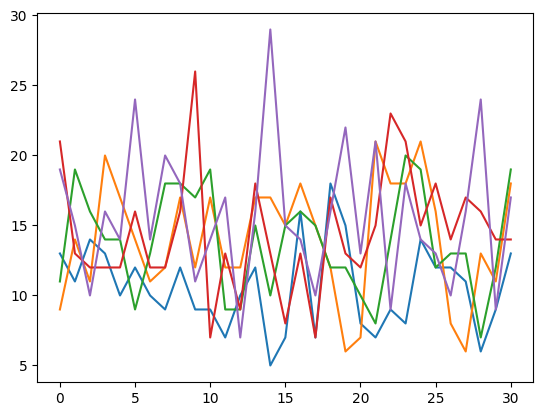

In [29]:
plt.plot(store1_item1.loc[(store1_item1['month'] == 1) & (store1_item1['year'] == 2013)]["sales"].values)
plt.plot(store1_item1.loc[(store1_item1['month'] == 1) & (store1_item1['year'] == 2014)]["sales"].values)
plt.plot(store1_item1.loc[(store1_item1['month'] == 1) & (store1_item1['year'] == 2015)]["sales"].values)
plt.plot(store1_item1.loc[(store1_item1['month'] == 1) & (store1_item1['year'] == 2016)]["sales"].values)
plt.plot(store1_item1.loc[(store1_item1['month'] == 1) & (store1_item1['year'] == 2017)]["sales"].values)
plt.plot(store1_item1.loc[(store1_item1['month'] == 1) & (store1_item1['year'] == 2018)]["sales"].values)

In [30]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

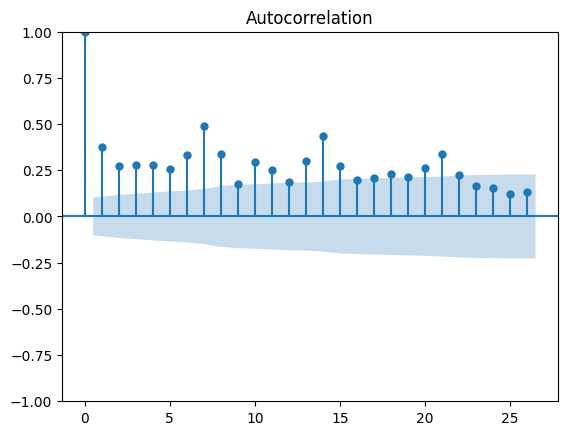

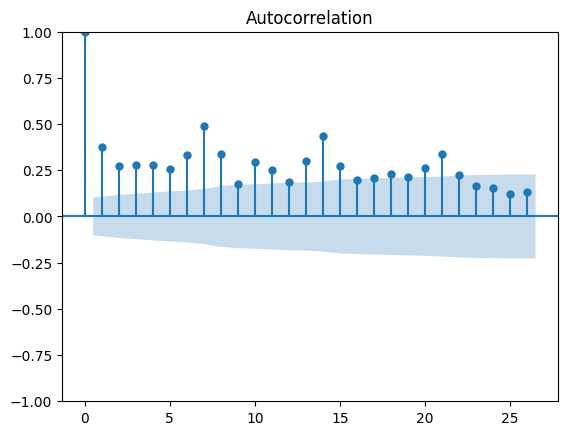

In [31]:
plot_acf(store1_item1[["sales", "date"]].iloc[:365].set_index(["date"]))

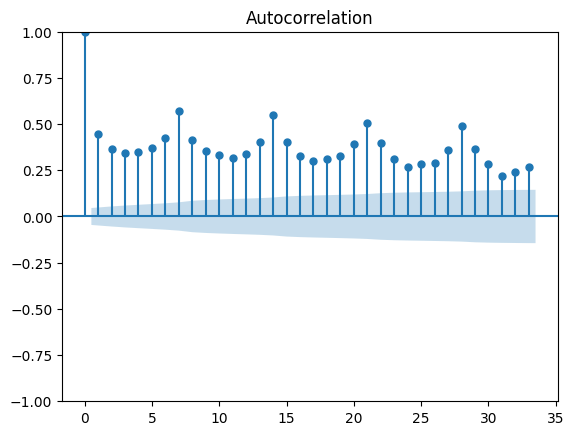

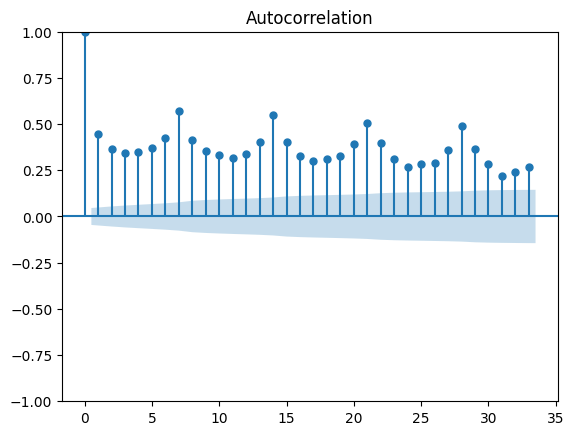

In [32]:
plot_acf(store1_item1[["sales", "date"]].set_index(["date"]))

In [ ]:
plot_acf(store1_item1["sales"].diff(1))

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np

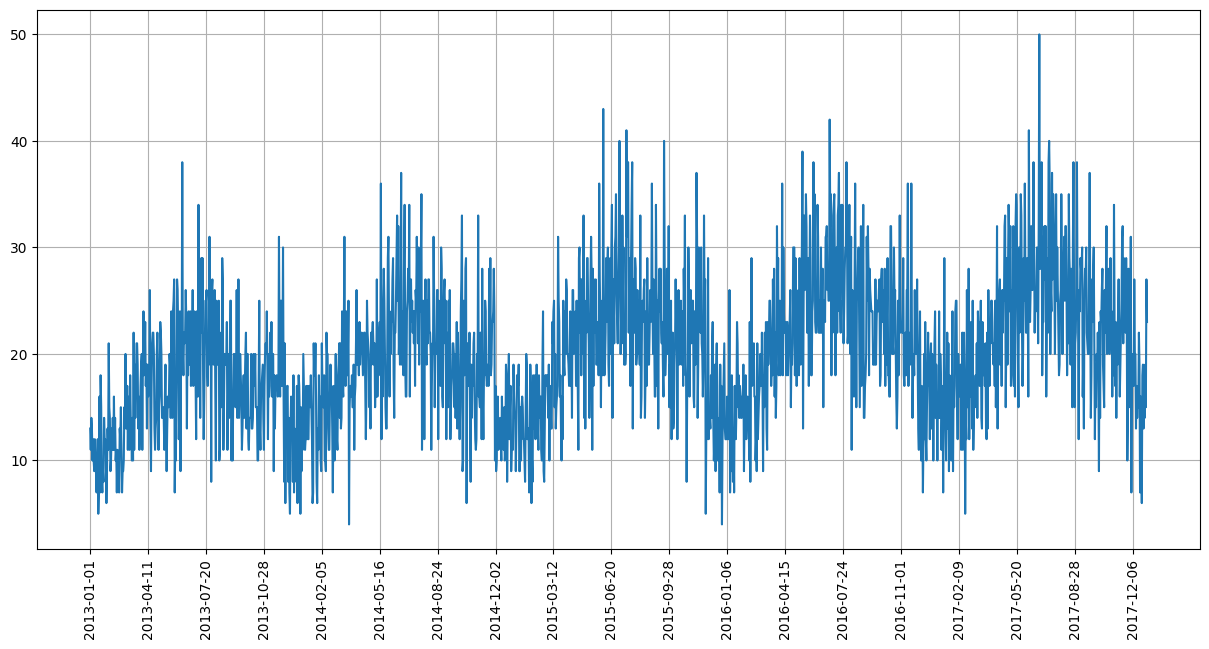

In [34]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(store1_item1["sales"].values)
ixs = np.arange(store1_item1["date"].shape[0])
plt.xticks(ixs[::100], store1_item1["date"].dt.date.values[::100], rotation=90);

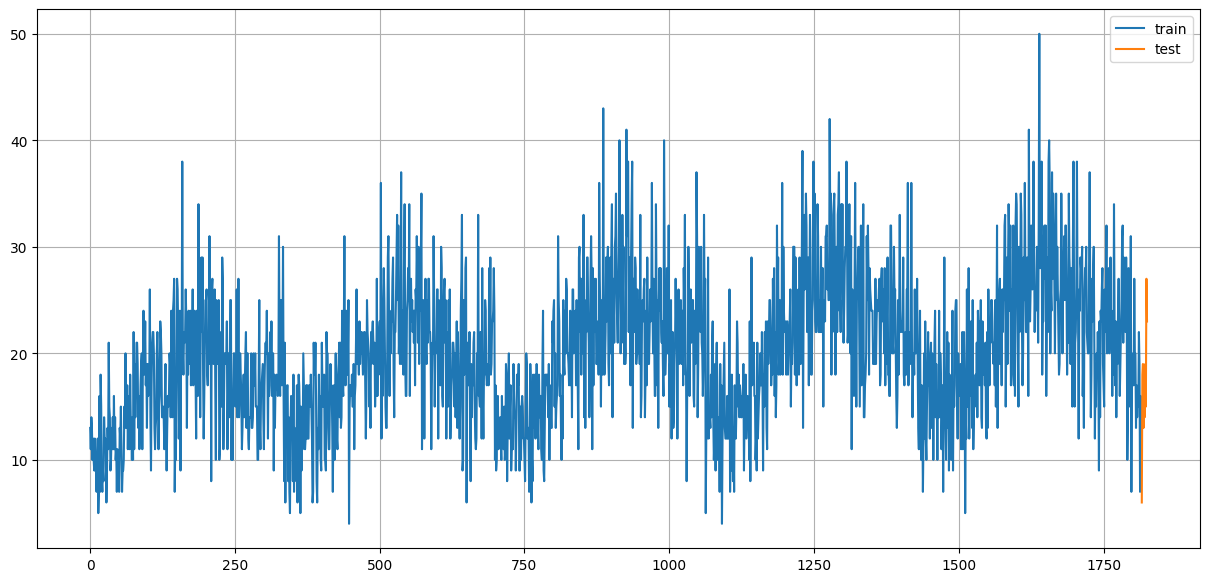

In [35]:
horizon = 10
train = store1_item1.iloc[:-horizon]
test = store1_item1.iloc[-horizon:]
train.shape, test.shape

train_s = np.arange(train.shape[0])
test_s = np.arange(test.shape[0])

plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(train_s, train["sales"].values, label='train')
plt.plot(test_s+train.shape[0], test["sales"].values, label='test')
plt.legend()

In [36]:
# baseline
const = train['sales'].iloc[-1]
predictions = [const for _ in range(horizon)]

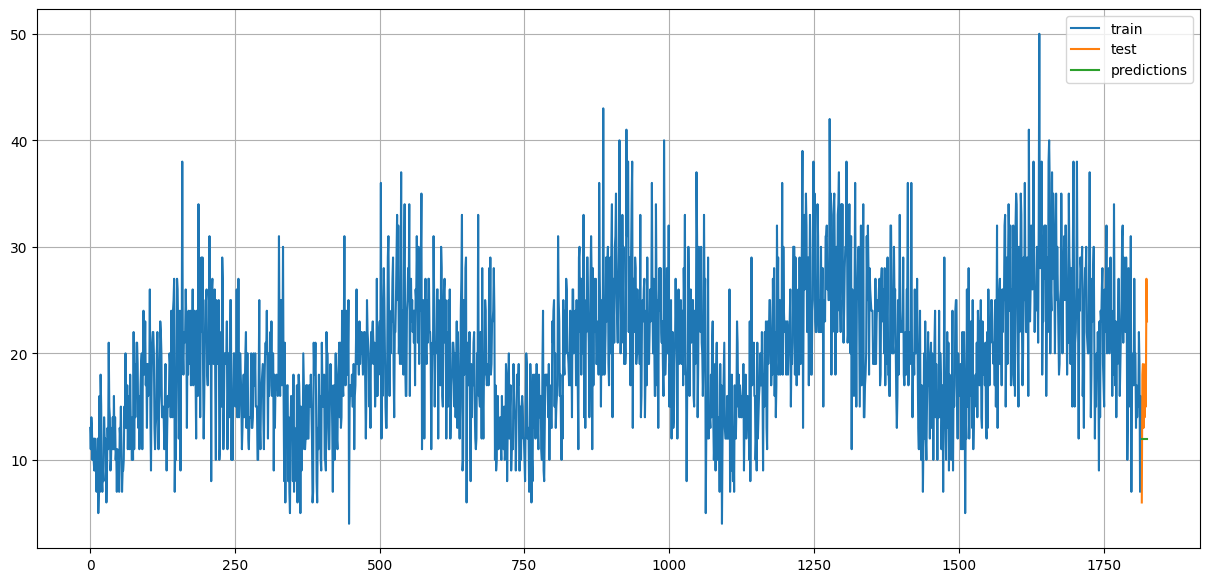

In [37]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(train_s, train["sales"].values, label='train')
plt.plot(test_s+train.shape[0], test["sales"].values, label='test')
plt.plot(test_s+train.shape[0], predictions, label='predictions')
plt.legend()

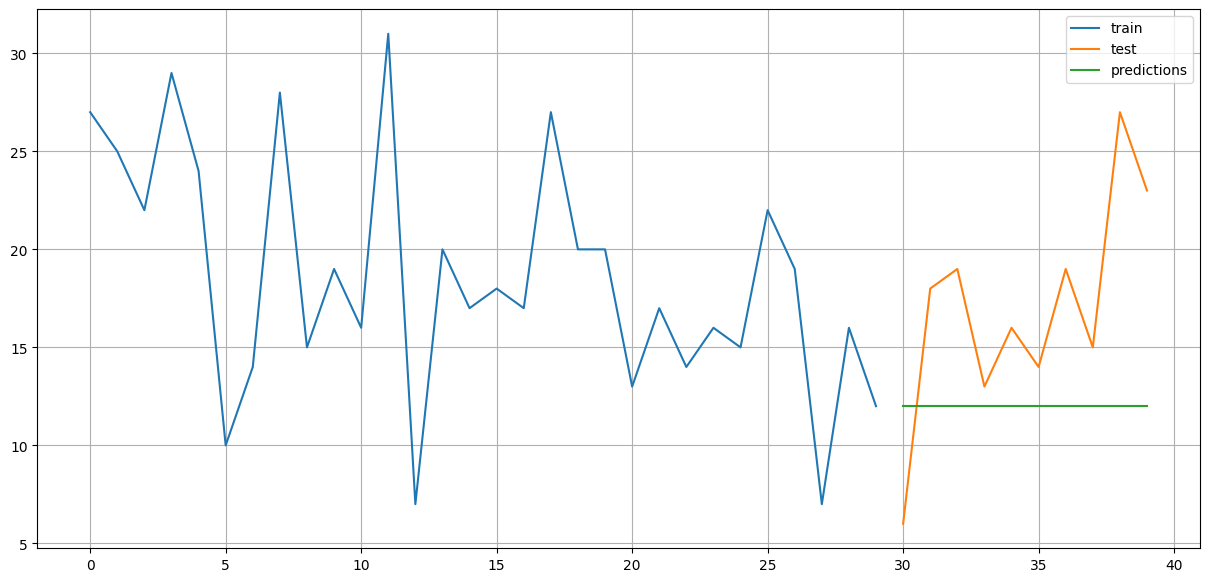

In [38]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(np.arange(30), train["sales"].values[-30:], label='train')
plt.plot(np.arange(10)+30, test["sales"].values[:], label='test')
plt.plot(np.arange(10)+30, predictions, label='predictions')
plt.legend()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
def get_mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)/y_true) * 100
    
mse = mean_squared_error(test["sales"].values, predictions)
mae = mean_absolute_error(test["sales"].values, predictions)
mape = get_mape(test["sales"].values, predictions)
mse, mae, mape

(54.6, 6.2, 37.73772083497483)

In [41]:
# baseline
predictions = [train['sales'].iloc[:-30].mean() for _ in range(horizon)]

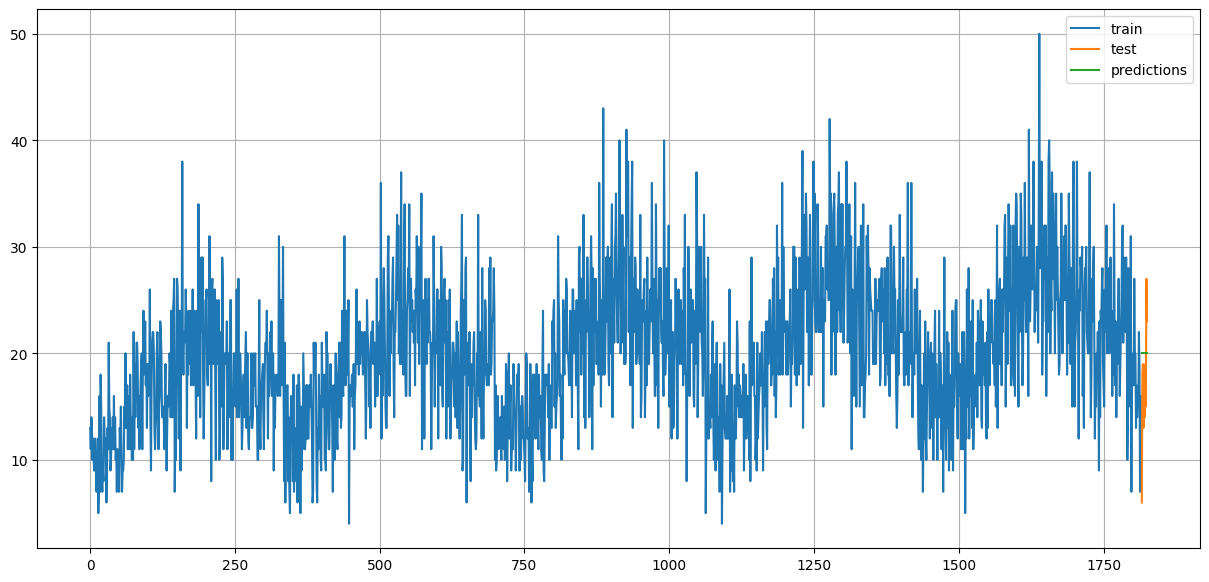

In [42]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(train_s, train["sales"].values, label='train')
plt.plot(test_s+train.shape[0], test["sales"].values, label='test')
plt.plot(test_s+train.shape[0], predictions, label='predictions')
plt.legend()

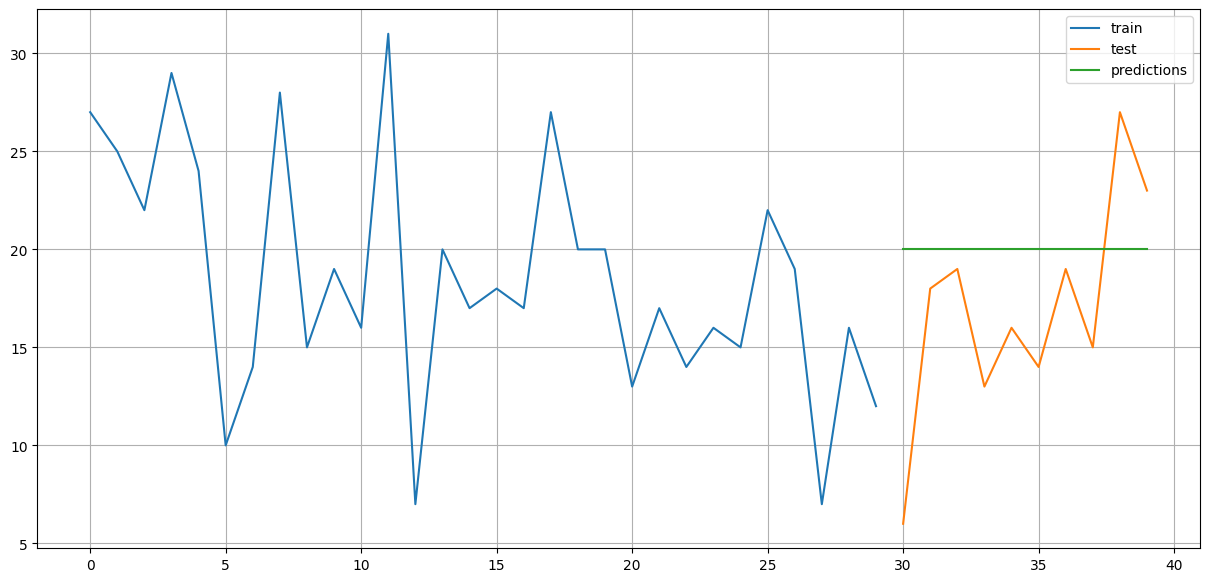

In [43]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(np.arange(30), train["sales"].values[-30:], label='train')
plt.plot(np.arange(10)+30, test["sales"].values[:], label='test')
plt.plot(np.arange(10)+30, predictions, label='predictions')
plt.legend()

In [44]:
def get_mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)/y_true) * 100
    
mse = mean_squared_error(test["sales"].values, predictions)
mae = mean_absolute_error(test["sales"].values, predictions)
mape = get_mape(test["sales"].values, predictions)
mse, mae, mape

(38.67068696556143, 5.007054871220603, 44.95934941405352)

In [45]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(train["sales"].values, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/asav/opt/anaconda3/envs/fun38/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1816
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -5633.393
Date:                Mon, 20 Feb 2023   AIC                          11274.785
Time:                        22:05:57   BIC                          11296.800
Sample:                             0   HQIC                         11282.908
                               - 1816                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7280      0.125     -5.835      0.000      -0.973      -0.483
ma.L1         -0.1330      0.115     -1.161      0.245      -0.357       0.091
ma.L2         -0.7178      0.102     -7.029      0.0

In [46]:
predictions = model_fit.forecast(steps=horizon)

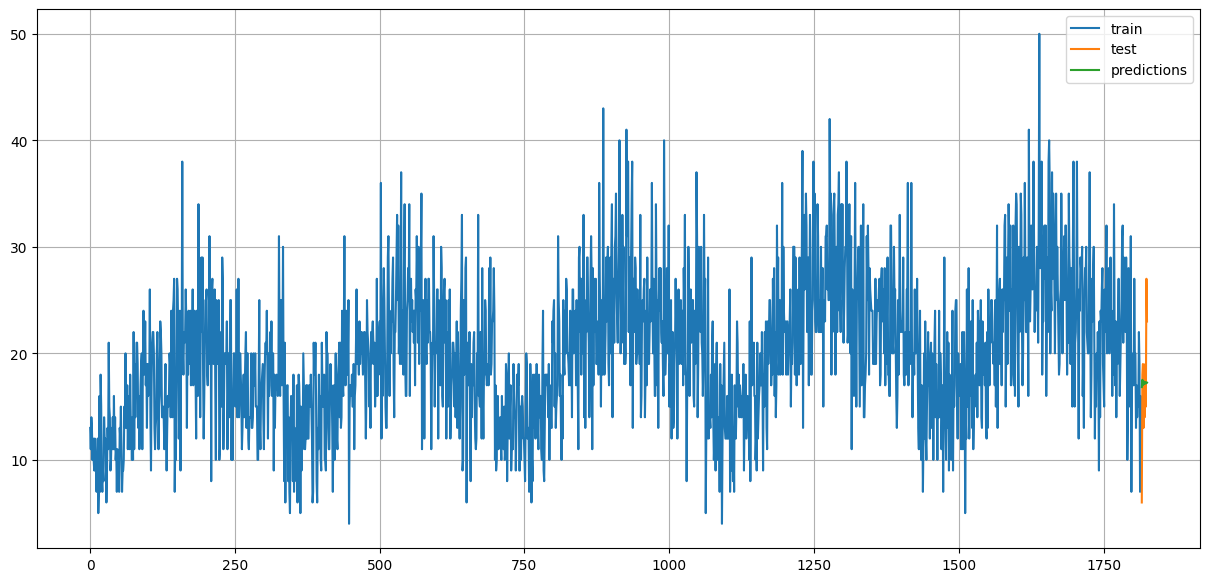

In [47]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(train_s, train["sales"].values, label='train')
plt.plot(test_s+train.shape[0], test["sales"].values, label='test')
plt.plot(test_s+train.shape[0], predictions, label='predictions')
plt.legend()

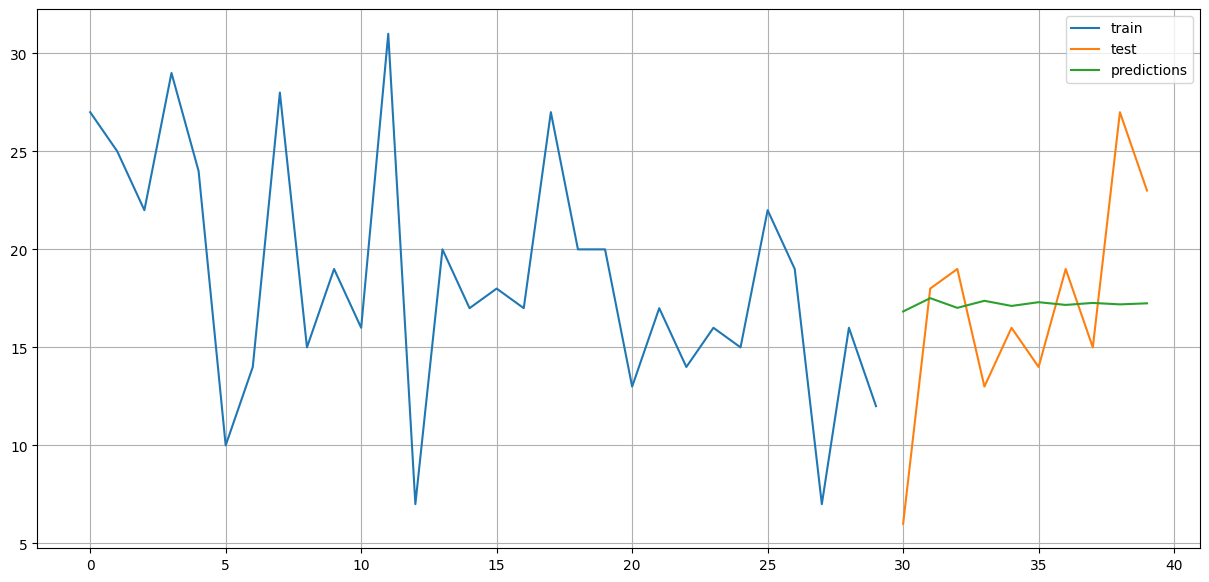

In [48]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(np.arange(30), train["sales"].values[-30:], label='train')
plt.plot(np.arange(10)+30, test["sales"].values[:], label='test')
plt.plot(np.arange(10)+30, predictions, label='predictions')
plt.legend()

In [49]:
mse = mean_squared_error(test["sales"].values, predictions)
mae = mean_absolute_error(test["sales"].values, predictions)
mape = get_mape(test["sales"].values, predictions)
mse, mae, mape

(29.056980746037095, 4.1759904127526974, 34.401818579693796)

In [ ]:
# feature engineering

In [50]:
import warnings

In [51]:
warnings.filterwarnings("ignore")

In [52]:
horizon = 10
train = store1_item1.iloc[:-horizon]
test = store1_item1.iloc[-horizon:]
train.shape, test.shape

((1816, 6), (10, 6))

In [53]:
import copy

In [54]:
def feature_engineering(X):
    df = copy.deepcopy(X)
    for i in range(1, 30):
        df[f"sales_lag_{i}"] = df['sales'].shift(i).values
        df[f"sales_log_lag_{i}"] = np.log1p(df[f"sales_lag_{i}"])
        # df[f"sales_diff_lag_{i}"] = df['sales'].values - df[f"sales_lag_{i}"].values
        # df[f"sales_diff_abs_lag_{i}"] = np.abs(df['sales'].values - df[f"sales_lag_{i}"].values)
        # df[f"sales_ratio_lag_{i}"] = df['sales'].values/df[f"sales_lag_{i}"].values

    for i in range(1, 7):
        df[f"sales_7mean_{i}"] = df[f"sales_lag_{i}"].rolling(7).mean()
        df[f"sales_7median_{i}"] = df[f"sales_lag_{i}"].rolling(7).median()
        df[f"sales_7min_{i}"] = df[f"sales_lag_{i}"].rolling(7).min()
        df[f"sales_7max_{i}"] = df[f"sales_lag_{i}"].rolling(7).max()

        df[f"sales_14mean_{i}"] = df[f"sales_lag_{i}"].rolling(14).mean()
        df[f"sales_14median_{i}"] = df[f"sales_lag_{i}"].rolling(14).median()
        df[f"sales_14min_{i}"] = df[f"sales_lag_{i}"].rolling(14).min()
        df[f"sales_14max_{i}"] = df[f"sales_lag_{i}"].rolling(14).max()

        df[f"sales_30mean_{i}"] = df[f"sales_lag_{i}"].rolling(30).mean()
        df[f"sales_30median_{i}"] = df[f"sales_lag_{i}"].rolling(30).median()
        df[f"sales_30min_{i}"] = df[f"sales_lag_{i}"].rolling(30).min()
        df[f"sales_30max_{i}"] = df[f"sales_lag_{i}"].rolling(30).max()


    df["day"] = df["date"].dt.day
    df["weekday"] = df["date"].dt.weekday
    df["is_weekend"] = df["weekday"].apply(lambda x: x in [5,6]).astype(int)


    df = df.iloc[30:]
    df = df.fillna(-1)
    return df

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=10)

In [57]:
# lags
df = feature_engineering(train)

X_train = df.drop(["date", 'item', "store", "sales"], axis=1)
y_train = df["sales"].values

for i, (train_index, valid_index) in enumerate(tss.split(X_train)):
    print(train_index.shape)
    np.random.shuffle(train_index)
    np.random.shuffle(valid_index)
    
    X_tr = X_train.iloc[train_index]
    y_tr = y_train[train_index]
    
    X_valid = X_train.iloc[valid_index]
    y_valid = y_train[valid_index]
    
    model = DecisionTreeRegressor()
    model.fit(X_tr, y_tr)
    
    valid_preds = model.predict(X_valid)
    
    mse = mean_squared_error(y_valid, valid_preds)
    mae = mean_absolute_error(y_valid, valid_preds)
    mape = get_mape(y_valid, valid_preds)
    print(mse, mae, mape)

(1736,)
26.7 4.9 24.56687862025054
(1746,)
32.8 4.4 19.337323831919434
(1756,)
38.2 5.2 28.106960190444763
(1766,)
120.7 8.7 52.295574681485505
(1776,)
48.5 5.7 47.11710838181426


In [58]:
horizon = 10
train = store1_item1.iloc[:-horizon].reset_index(drop=True)
train['sales'] = train['sales'].astype(float)
test = store1_item1.iloc[-horizon:].reset_index(drop=True)
test['sales'] = test['sales'].astype(float)
print(train.shape, test.shape)

updated_test = copy.deepcopy(test)

(1816, 6) (10, 6)


In [59]:
predictions = []
for i in range(test.shape[0]):
    if i > 0:
        updated_test.loc[range(i), "sales"] = predictions
    test_for_insert = updated_test.iloc[:i+1]
    extended_train = pd.concat([train, test_for_insert], axis=0).reset_index(drop=True)
    extended_df = feature_engineering(extended_train)
    # print(extended_df[['sales', 'sales_lag_1']].iloc[-1])
    extended_df_data = extended_df.drop(["date", 'item', "store", "sales"], axis=1)
    pred = model.predict([extended_df_data.iloc[-1]])[0]
    predictions.append(pred)
    
print(predictions)

mse = mean_squared_error(test['sales'], predictions)
mae = mean_absolute_error(test['sales'], predictions)
mape = get_mape(test['sales'], predictions)
print(mse, mae, mape)

[9.0, 18.0, 33.0, 19.0, 12.0, 10.0, 6.0, 9.0, 10.0, 15.0]
83.1 7.5 42.95761095417846


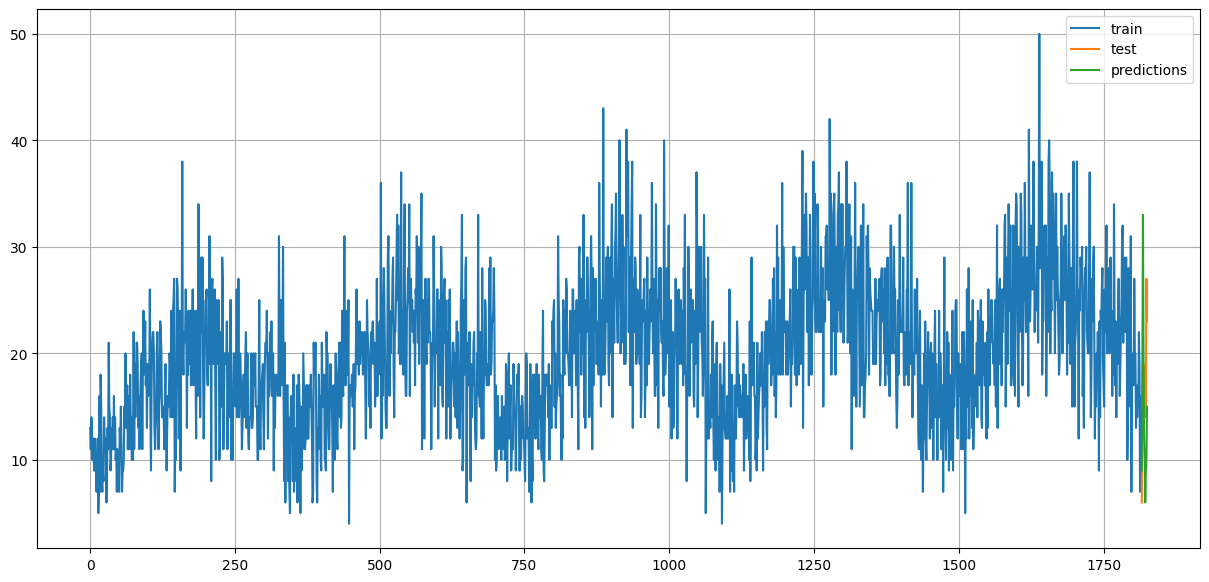

In [60]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(train_s, train["sales"].values, label='train')
plt.plot(test_s+train.shape[0], test["sales"].values, label='test')
plt.plot(test_s+train.shape[0], predictions, label='predictions')
plt.legend()

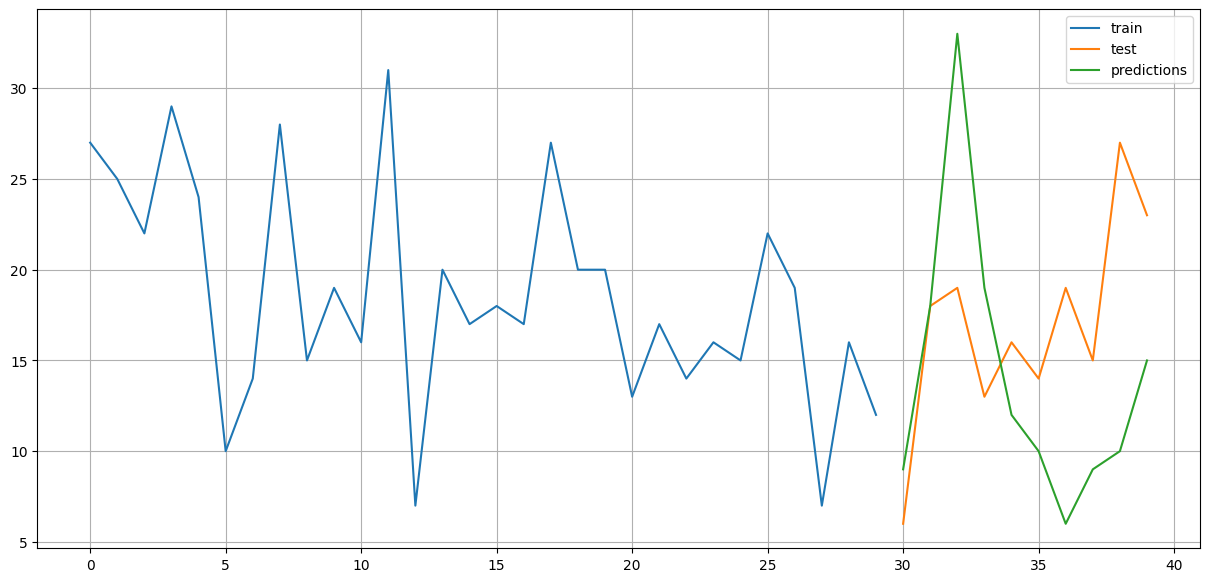

In [61]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(np.arange(30), train["sales"].values[-30:], label='train')
plt.plot(np.arange(10)+30, test["sales"].values[:], label='test')
plt.plot(np.arange(10)+30, predictions, label='predictions')
plt.legend()

In [62]:
from lightgbm import LGBMRegressor

In [63]:
# lags
df = feature_engineering(train)

X_train = df.drop(["date", 'item', "store", "sales"], axis=1)
y_train = df["sales"].values

for i, (train_index, valid_index) in enumerate(tss.split(X_train)):
    print(train_index.shape)
    np.random.shuffle(train_index)
    np.random.shuffle(valid_index)
    
    X_tr = X_train.iloc[train_index]
    y_tr = y_train[train_index]
    
    X_valid = X_train.iloc[valid_index]
    y_valid = y_train[valid_index]
    
    model = LGBMRegressor()
    model.fit(X_tr, y_tr)
    
    valid_preds = model.predict(X_valid)
    
    mse = mean_squared_error(y_valid, valid_preds)
    mae = mean_absolute_error(y_valid, valid_preds)
    mape = get_mape(y_valid, valid_preds)
    print(mse, mae, mape)

(1736,)
15.312200767083933 3.063970505647368 15.687612935876889
(1746,)
16.17381846064901 3.318275782567762 13.74380966959573
(1756,)
26.813322588343993 4.2625016386043 24.689624642396737
(1766,)
36.901251429469575 5.361039882951876 36.01569260975596
(1776,)
13.080171110944374 2.8270385170401298 24.323128584756507


In [64]:
horizon = 10
train = store1_item1.iloc[:-horizon].reset_index(drop=True)
train['sales'] = train['sales'].astype(float)
test = store1_item1.iloc[-horizon:].reset_index(drop=True)
test['sales'] = test['sales'].astype(float)
print(train.shape, test.shape)

updated_test = copy.deepcopy(test)

(1816, 6) (10, 6)


In [65]:
predictions = []
for i in range(test.shape[0]):
    if i > 0:
        updated_test.loc[range(i), "sales"] = predictions
    test_for_insert = updated_test.iloc[:i+1]
    extended_train = pd.concat([train, test_for_insert], axis=0).reset_index(drop=True)
    extended_df = feature_engineering(extended_train)
    # print(extended_df[['sales', 'sales_lag_1']].iloc[-1])
    extended_df_data = extended_df.drop(["date", 'item', "store", "sales"], axis=1)
    pred = model.predict([extended_df_data.iloc[-1]])[0]
    predictions.append(pred)
    
print(predictions)

mse = mean_squared_error(test['sales'], predictions)
mae = mean_absolute_error(test['sales'], predictions)
mape = get_mape(test['sales'], predictions)
print(mse, mae, mape)

[14.712244589228408, 16.30491699044465, 19.425258521359527, 12.058379781021658, 12.61094767807369, 15.776236651634841, 13.922906977931584, 13.36540463108349, 14.031614474883884, 16.478081953120995]
33.364791163503206 4.314148727566282 31.19776887847535


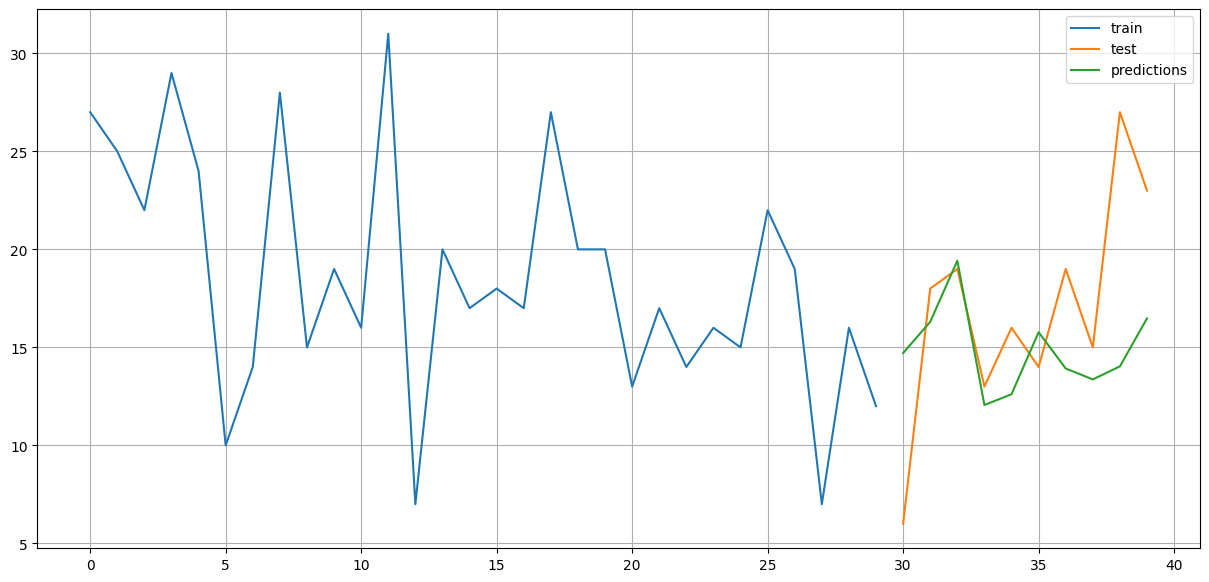

In [66]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(np.arange(30), train["sales"].values[-30:], label='train')
plt.plot(np.arange(10)+30, test["sales"].values[:], label='test')
plt.plot(np.arange(10)+30, predictions, label='predictions')
plt.legend()

In [67]:
X_train = np.random.normal(size=(10000, 40))
y_train = np.random.normal(size=(10000, 3))

X_test = np.random.normal(size=(10, 40))
y_test = np.random.normal(size=(10, 3))

In [68]:
X_train.shape, y_train.shape

((10000, 40), (10000, 3))

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dtr = DecisionTreeRegressor()

In [71]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [72]:
preds = dtr.predict(X_test)

In [74]:
preds.shape

(10, 3)

In [75]:
preds[0]

array([-0.17705975,  1.11160098, -2.19599081])

In [77]:
y_test[0,:]

array([-0.5005103 ,  1.45316439,  1.07218552])